##Setup

In [1]:
%matplotlib inline

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import thunder
from showit import image, tile
import matplotlib.animation as animation

In [4]:
from os.path import join, exists
from os import mkdir, makedirs

In [5]:
from numpy import save

In [6]:
from skimage.io import imsave, imread

In [7]:
from lightning import Lightning

In [8]:
from regional import many
from numpy import random


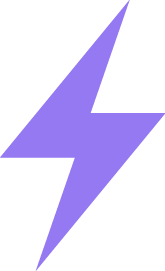

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [10]:
server = 'http://kafka1.int.janelia.org:3000'
server = 'http://localhost:3000'
lgn = Lightning(server, ipython=True)

In [11]:
def normalize(oim):
    # normalizes 3D image across first axis
    assert oim.ndim == 3
    
    means = oim.mean(axis=(1, 2), dtype='float32')
    return array([oim[i]/means[i]/4 for i in range(oim.shape[0])]).clip(0, 1)

##Set directory and session information

In [16]:
directory = '/volumes/freeman/Nick/lfov.calibration'

In [17]:
key = '2016-04-01'
name = 'anm-0326049'

In [18]:
path = join(directory, 'reprocessed', name, key)
print exists(path)

True


##Create savepath

In [19]:
savepath = join(path, 'sources')
if not exists(savepath):
    makedirs(savepath)

##Load data

In [27]:
data = imread(join(path, 'summary', 'mean.tif'), plugin='tifffile')

In [28]:
norm = normalize(data)

##Select plane (if necessary)

In [29]:
plane = 0
img = norm[plane]

##Load sources

In [205]:
with open(join(path, 'sources', 'sources-%04d.tif' % plane)) as fid:
    sources = many([x['coordinates'] for x in json.load(fid)])

IOError: [Errno 2] No such file or directory: '/volumes/freeman/Nick/lfov.calibration/reprocessed/anm-0326049/2016-04-01/sources/sources-0000.tif'

##Show image

In [206]:
viz = lgn.imagepoly(img)
viz

In [188]:
sources = many(viz.points())

##Show sources

In [189]:
from numpy import maximum, tile

In [198]:
base = tile(img,(3,1,1)).transpose(1,2,0)
masks = sources.mask(img.shape, background='black', fill='blue', stroke='orange')
blend = maximum(base, masks)

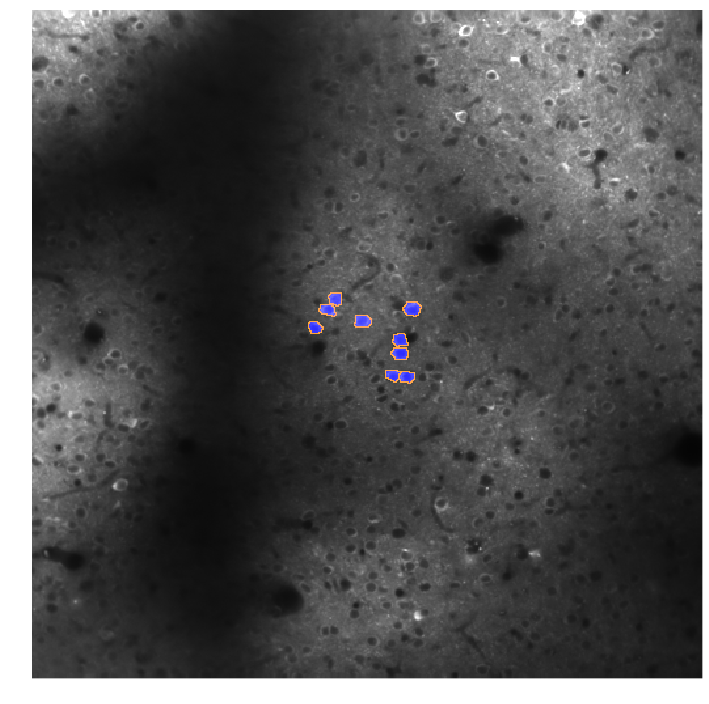

In [199]:
fig = plt.figure(figsize=[12,12])
ax = plt.axes()
im = image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);
#for s in range(sources.count):
#    plt.annotate(s=str(s), xy=[sources.center[s][1],sources.center[s][0]], color='w', size = 20);

In [203]:
imsave(join(path, 'sources', 'sources-%04d.tif' % plane), (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

IOError: [Errno 2] No such file or directory: '/volumes/freeman/Nick/lfov.calibration/reprocessed/anm-0326049/2016-04-01/sources/sources-0000.tif'

In [207]:
###multi dim nature of this ...

In [ ]:
foo = sources.masks((512,512,4), color='blue', base=X)
image(foo[:,:,1,:])

In [227]:
from numpy import concatenate

In [231]:
x = many([[concatenate((x, [plane])) for x in roi.coordinates] for roi in sources])

In [235]:
if norm.ndim == 2:
    base = tile(norm,(3,1,1)).transpose(1,2,0)
    masks = sources.mask(norm.shape, background='black', fill='blue', stroke='orange')
    blend = maximum(base, masks)
else:
    base = tile(norm,(3,1,1,1)).transpose(1,2,3,0)
    masks = [sources.mask(norm.shape, background='black', fill='blue', stroke='orange')



ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [ ]:
def mask(sources, shape, **kwargs):
    if len(shape) == 3:
        
    else:
        return sources.mask(shape, **kwargs)

In [1]:
import regional

In [2]:
regional.__version__

'1.0.1'

In [19]:
a = [1, 18, 35]
b = [2, 20, 40]

In [5]:
import numpy as np

In [20]:
x = np.stack((a, b), axis = 1)

In [21]:
x

array([[ 1,  2],
       [18, 20],
       [35, 40]])

In [23]:
x[:,0]

array([ 1, 18, 35])

##Save sources